In [1]:
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

# Information Visualization
## Exercise 1

In [2]:
df = pd.read_csv("betterLifeIndexTable.csv", sep=";", skiprows = 1)

In [3]:
df.columns

Index(['Unnamed: 0', '  Dwellings without basic facilities',
       '  Housing expenditure', '  Rooms per person',
       '  Household net adjusted disposable income', '  Household net wealth',
       '  Labour market insecurity', '  Employment rate',
       '  Long-term unemployment rate', '  Personal earnings',
       '  Quality of support network', '  Educational attainment',
       '  Student skills', '  Years in education', '  Air pollution',
       '  Water quality',
       '  Stakeholder engagement for developing regulations',
       '  Voter turnout', '  Life expectancy', '  Self-reported health',
       '  Life satisfaction', '  Feeling safe walking alone at night',
       '  Homicide rate', '  Employees working very long hours',
       '  Time devoted to leisure and personal care'],
      dtype='object')

### Data Preprocess

In [4]:
df.columns = df.columns.str.replace(" ", "")

In [5]:
df = df.rename(columns={"Unnamed:0": "Countries"})

In [6]:
df.head()

,Countries,Dwellingswithoutbasicfacilities,Housingexpenditure,Roomsperperson,Householdnetadjusteddisposableincome,Householdnetwealth,Labourmarketinsecurity,Employmentrate,Long-termunemploymentrate,Personalearnings,...,Waterquality,Stakeholderengagementfordevelopingregulations,Voterturnout,Lifeexpectancy,Self-reportedhealth,Lifesatisfaction,Feelingsafewalkingaloneatnight,Homiciderate,Employeesworkingverylonghours,Timedevotedtoleisureandpersonalcare
0,Australia,..,20,..,32759,427064,"5,4",73,"1,31",49126,...,93,"2,7",91,"82,5",85,"7,3","63,5","1,1","13,04","14,35"
1,Austria,"0,9",21,"1,6",33541,308325,"3,5",72,"1,84",50349,...,92,"1,3",80,"81,7",70,"7,1","80,6","0,5","6,66","14,55"
2,Belgium,"1,9",21,"2,2",30364,386006,"3,7",63,"3,54",49675,...,84,2,89,"81,5",74,"6,9","70,1",1,"4,75","15,7"
3,Canada,"0,2",22,"2,6",30854,423849,6,73,"0,77",47622,...,91,"2,9",68,"81,9",88,"7,4","82,2","1,3","3,69","14,56"
4,Chile,"9,4",18,"1,2",..,100967,"8,7",63,..,25879,...,71,"1,3",47,"79,9",57,"6,5","47,9","4,2","9,72",..


In [7]:
df.shape

(41, 25)

In [8]:
df.Countries.unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'United States',
       'OECD - Total', 'Brazil', 'Russia', 'South Africa'], dtype=object)

In [9]:
df[df.Countries == "OECD - Total"]

,Countries,Dwellingswithoutbasicfacilities,Housingexpenditure,Roomsperperson,Householdnetadjusteddisposableincome,Householdnetwealth,Labourmarketinsecurity,Employmentrate,Long-termunemploymentrate,Personalearnings,...,Waterquality,Stakeholderengagementfordevelopingregulations,Voterturnout,Lifeexpectancy,Self-reportedhealth,Lifesatisfaction,Feelingsafewalkingaloneatnight,Homiciderate,Employeesworkingverylonghours,Timedevotedtoleisureandpersonalcare
37,OECD - Total,"4,4",20,"1,8",33604,408376,7,68,"1,78",43241,...,81,"2,4",68,"80,2",69,"6,5","68,4","3,7","11,01","14,98"


In [10]:
df.drop(index=37, inplace = True)

In [11]:
df = df.reset_index(drop=True)

In [12]:
df.dtypes

Countries                                        object
Dwellingswithoutbasicfacilities                  object
Housingexpenditure                               object
Roomsperperson                                   object
Householdnetadjusteddisposableincome             object
Householdnetwealth                               object
Labourmarketinsecurity                           object
Employmentrate                                    int64
Long-termunemploymentrate                        object
Personalearnings                                 object
Qualityofsupportnetwork                           int64
Educationalattainment                            object
Studentskills                                    object
Yearsineducation                                 object
Airpollution                                      int64
Waterquality                                      int64
Stakeholderengagementfordevelopingregulations    object
Voterturnout                                    

In [13]:
df = df.replace("..", np.NaN)

In [14]:
df.isnull().sum()

Countries                                         0
Dwellingswithoutbasicfacilities                   3
Housingexpenditure                                2
Roomsperperson                                    3
Householdnetadjusteddisposableincome             11
Householdnetwealth                               12
Labourmarketinsecurity                            7
Employmentrate                                    0
Long-termunemploymentrate                         2
Personalearnings                                  5
Qualityofsupportnetwork                           0
Educationalattainment                             1
Studentskills                                     1
Yearsineducation                                  1
Airpollution                                      0
Waterquality                                      0
Stakeholderengagementfordevelopingregulations     2
Voterturnout                                      0
Lifeexpectancy                                    0
Self-reporte

In [15]:
pd.set_option('display.max_columns', None)
df.head(5)

,Countries,Dwellingswithoutbasicfacilities,Housingexpenditure,Roomsperperson,Householdnetadjusteddisposableincome,Householdnetwealth,Labourmarketinsecurity,Employmentrate,Long-termunemploymentrate,Personalearnings,Qualityofsupportnetwork,Educationalattainment,Studentskills,Yearsineducation,Airpollution,Waterquality,Stakeholderengagementfordevelopingregulations,Voterturnout,Lifeexpectancy,Self-reportedhealth,Lifesatisfaction,Feelingsafewalkingaloneatnight,Homiciderate,Employeesworkingverylonghours,Timedevotedtoleisureandpersonalcare
0,Australia,NaN,20,NaN,32759,427064,"5,4",73,"1,31",49126,95,81,502,21,5,93,"2,7",91,"82,5",85,"7,3","63,5","1,1","13,04","14,35"
1,Austria,"0,9",21,"1,6",33541,308325,"3,5",72,"1,84",50349,92,85,492,17,16,92,"1,3",80,"81,7",70,"7,1","80,6","0,5","6,66","14,55"
2,Belgium,"1,9",21,"2,2",30364,386006,"3,7",63,"3,54",49675,91,77,503,"19,3",15,84,2,89,"81,5",74,"6,9","70,1",1,"4,75","15,7"
3,Canada,"0,2",22,"2,6",30854,423849,6,73,"0,77",47622,93,91,523,"17,3",7,91,"2,9",68,"81,9",88,"7,4","82,2","1,3","3,69","14,56"
4,Chile,"9,4",18,"1,2",NaN,100967,"8,7",63,NaN,25879,85,65,443,"17,5",16,71,"1,3",47,"79,9",57,"6,5","47,9","4,2","9,72",NaN


In [16]:
for col in df.columns[1:]:
    if (col in ["Employmentrate", "Qualityofsupportnetwork", "Airpollution", "Waterquality", "Voterturnout"]):
        continue
    df[col] = df[col].str.replace(',', '.')
    df[col] = df[col].astype(float)

In [17]:
df.dtypes

Countries                                         object
Dwellingswithoutbasicfacilities                  float64
Housingexpenditure                               float64
Roomsperperson                                   float64
Householdnetadjusteddisposableincome             float64
Householdnetwealth                               float64
Labourmarketinsecurity                           float64
Employmentrate                                     int64
Long-termunemploymentrate                        float64
Personalearnings                                 float64
Qualityofsupportnetwork                            int64
Educationalattainment                            float64
Studentskills                                    float64
Yearsineducation                                 float64
Airpollution                                       int64
Waterquality                                       int64
Stakeholderengagementfordevelopingregulations    float64
Voterturnout                   

I am going to use Simple Imputer to add mean value for each column. 
We have the most NaN values in columns **Householdnetwealth, Householdnetadjusteddisposableincome and Labourmarketinsecurity**

In [18]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df.drop("Countries", axis = 1))

SimpleImputer()

In [19]:
imputed = imp.transform(df.drop("Countries", axis = 1))

In [20]:
df_imputed = pd.DataFrame(imputed, columns=df.columns[1:])

In [21]:
df_imputed["Countries"] = df.Countries

In [22]:
df_imputed.head()

,Dwellingswithoutbasicfacilities,Housingexpenditure,Roomsperperson,Householdnetadjusteddisposableincome,Householdnetwealth,Labourmarketinsecurity,Employmentrate,Long-termunemploymentrate,Personalearnings,Qualityofsupportnetwork,Educationalattainment,Studentskills,Yearsineducation,Airpollution,Waterquality,Stakeholderengagementfordevelopingregulations,Voterturnout,Lifeexpectancy,Self-reportedhealth,Lifesatisfaction,Feelingsafewalkingaloneatnight,Homiciderate,Employeesworkingverylonghours,Timedevotedtoleisureandpersonalcare,Countries
0,5.075676,20.0,1.632432,32759.000000,427064.0,5.4,73.0,1.310000,49126.0,95.0,81.0,502.0,21.0,5.0,93.0,2.7,91.0,82.5,85.0,7.3,63.5,1.1,13.04,14.350000,Australia
1,0.900000,21.0,1.600000,33541.000000,308325.0,3.5,72.0,1.840000,50349.0,92.0,85.0,492.0,17.0,16.0,92.0,1.3,80.0,81.7,70.0,7.1,80.6,0.5,6.66,14.550000,Austria
2,1.900000,21.0,2.200000,30364.000000,386006.0,3.7,63.0,3.540000,49675.0,91.0,77.0,503.0,19.3,15.0,84.0,2.0,89.0,81.5,74.0,6.9,70.1,1.0,4.75,15.700000,Belgium
3,0.200000,22.0,2.600000,30854.000000,423849.0,6.0,73.0,0.770000,47622.0,93.0,91.0,523.0,17.3,7.0,91.0,2.9,68.0,81.9,88.0,7.4,82.2,1.3,3.69,14.560000,Canada
4,9.400000,18.0,1.200000,27807.310345,100967.0,8.7,63.0,2.836842,25879.0,85.0,65.0,443.0,17.5,16.0,71.0,1.3,47.0,79.9,57.0,6.5,47.9,4.2,9.72,15.084545,Chile


### Data Visualization

#### Air Pollution

Top 8 Countries with High Airpollution index 

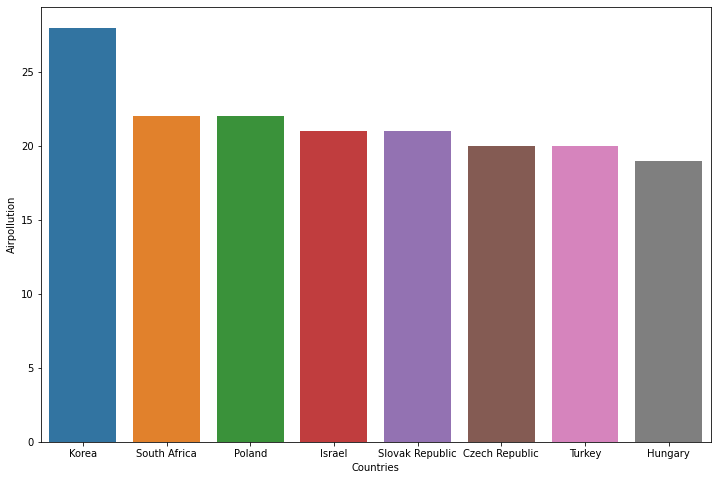

In [23]:
plt.figure(figsize=(12, 8))
sns.barplot(x= df_imputed.Countries, y=df_imputed.Airpollution, order=df_imputed.sort_values("Airpollution",ascending=False).Countries[:8])
plt.show()

Top 8 Countries with Low Airpollution index

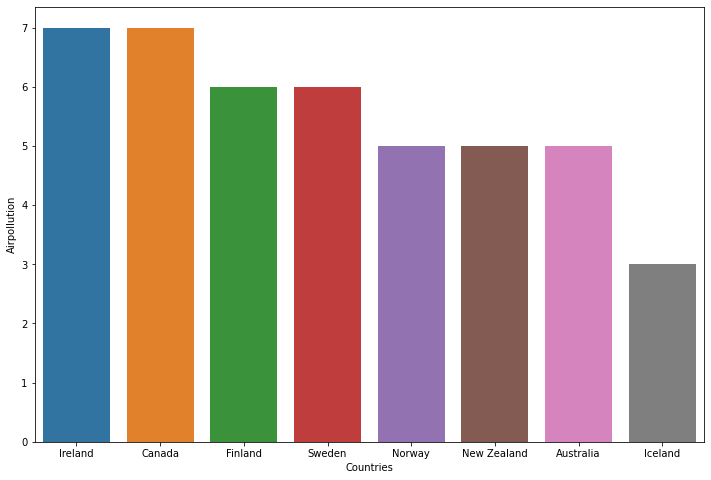

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x= df_imputed.Countries, y=df_imputed.Airpollution, order=df_imputed.sort_values("Airpollution", ascending=False).Countries[-8:])
plt.show()

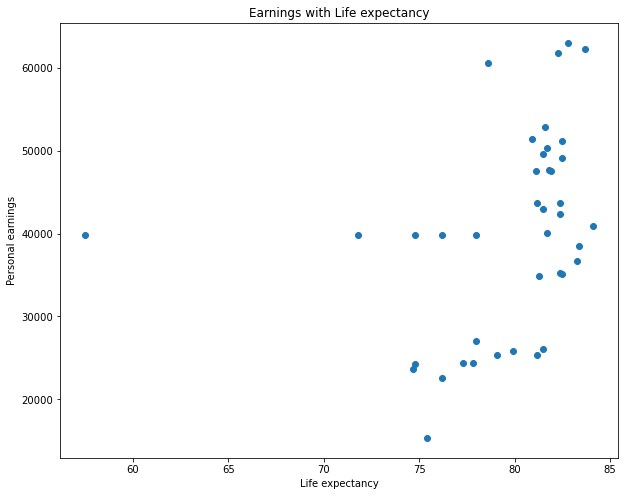

In [25]:
plt.figure(figsize=(10,8))
plt.title("Earnings with Life expectancy")
plt.scatter(df_imputed.Lifeexpectancy, df_imputed.Personalearnings)
plt.xlabel("Life expectancy")
plt.ylabel("Personal earnings")
plt.show()

We see the higher life expectancy is growing with the perosnal earnings.

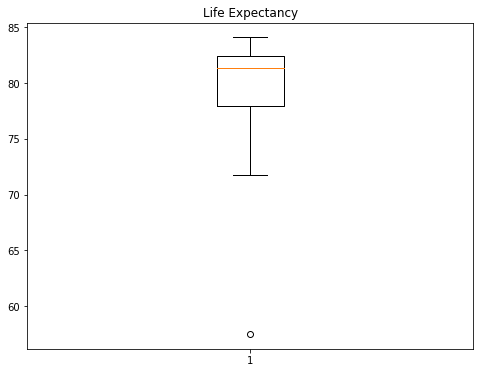

In [26]:
plt.figure(figsize=(8,6))
plt.title("Life Expectancy")
plt.boxplot(df_imputed.Lifeexpectancy)
plt.show()

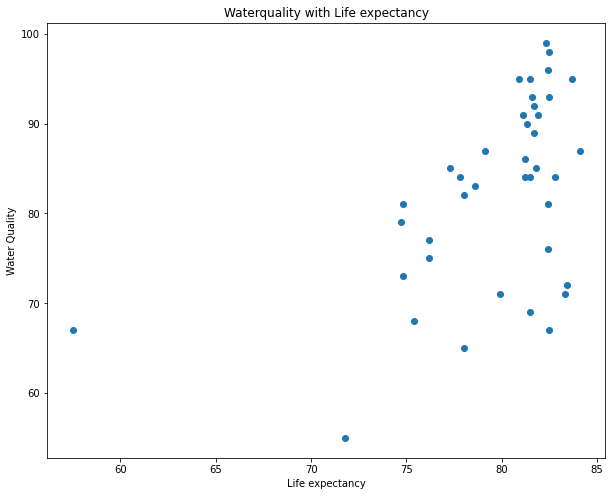

In [27]:
plt.figure(figsize=(10,8))
plt.title("Waterquality with Life expectancy")
plt.scatter(df_imputed.Lifeexpectancy, df_imputed.Waterquality)
plt.xlabel("Life expectancy")
plt.ylabel("Water Quality")
plt.show()

We have better life expectancy with higher water quality

In [28]:
df_imputed.to_csv("./betterLifeIndex_imputed.csv")

<AxesSubplot:>

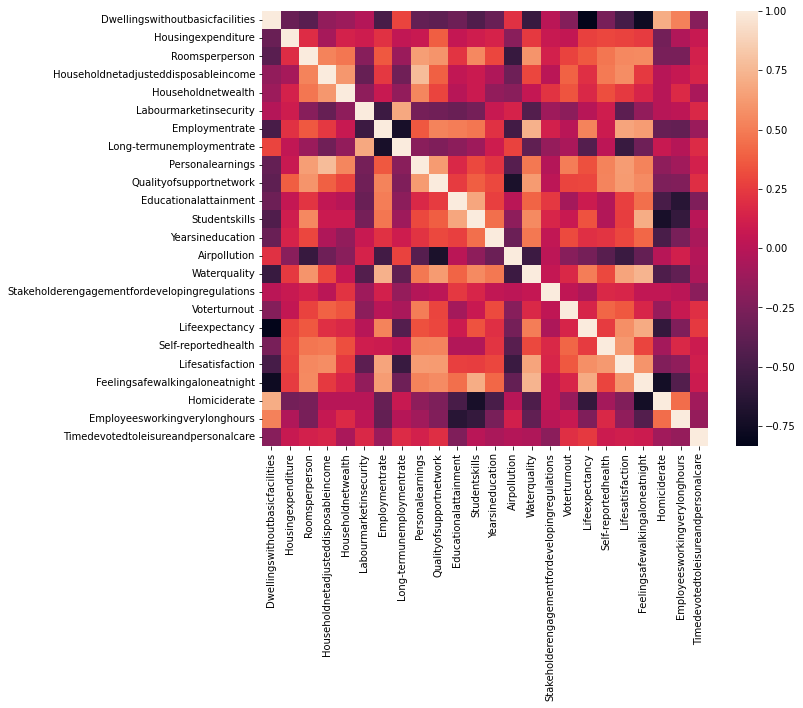

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df_imputed.corr())

In [30]:
pca = PCA(n_components=15)

In [31]:
df_2 = df_imputed.set_index("Countries")

In [32]:
df_pca = pca.fit_transform(df_2)

<AxesSubplot:>

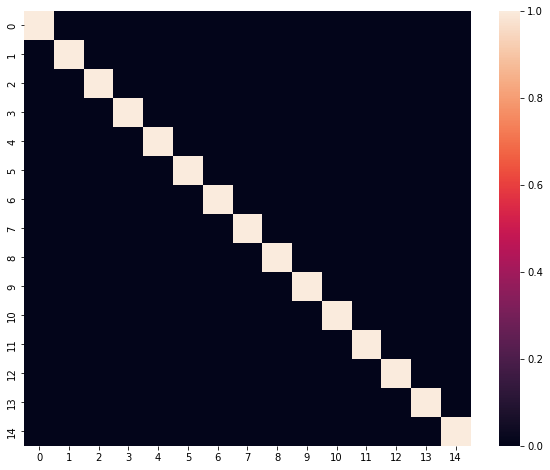

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(np.corrcoef(df_pca, rowvar=False))

In [35]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Dwellingswithoutbasicfacilities                40 non-null     float64
 1   Housingexpenditure                             40 non-null     float64
 2   Roomsperperson                                 40 non-null     float64
 3   Householdnetadjusteddisposableincome           40 non-null     float64
 4   Householdnetwealth                             40 non-null     float64
 5   Labourmarketinsecurity                         40 non-null     float64
 6   Employmentrate                                 40 non-null     float64
 7   Long-termunemploymentrate                      40 non-null     float64
 8   Personalearnings                               40 non-null     float64
 9   Qualityofsupportnetwork                        40 non-nu